<a href="https://colab.research.google.com/github/oghzzang/AMC_NGS1/blob/master/02_linux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코드 실행시 참고할 점

- code block의 맨 앞에 "!" 붙은 경우 terminal 에서 같이 실행할 예정임. "!" 만 제외하고 붙여넣기

- 터미널에서만, 노트북에서만 등 표시가 있는 것은 실행에 유의하기 (순서대로 같이 진행)

- 궁금한 점, 나중에 확인하고 싶은 것 등 필기를 하고싶으면 code block에 주석달기 혹은 댓글 추가 기능 활용

- **경로확인 => 터미널의 파란색 글씨**

In [ ]:
# 필기

# Setting

아래 ```drive.mount('/content/drive')``` 실행 시 팝업이 뜹니다. `구글 drive 연결` 누르시고 계정 선택 후 확인 누르시면됩니다.

In [1]:
#runtime: 30s
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from contextlib import contextmanager
import os

def cd(newdir):
  os.chdir(newdir)

In [3]:
!mkdir -p /content/drive/MyDrive/AMC_NGS1/02_linux

이번 실습의 모든 분석은 /content/drive/MyDrive/AMC_NGS1/02_linux 에서 수행합니다. 링크 클릭하면 왼쪽에 패널이 활성화 됩니다.

In [4]:
# 폴더 이동시에만 주의
!cd /content/drive/MyDrive/AMC_NGS1/02_linux
cd("/content/drive/MyDrive/AMC_NGS1/02_linux") # 노트북에서만 실행

## 리눅스 환경 확인

In [5]:
!cat /etc/issue

Ubuntu 22.04.4 LTS \n \l



## 기본 리눅스 명령어

list files: ```ls```

In [6]:
!ls -al

total 0


show file structure: `tree`

In [9]:
!tree --help

In [8]:
#runtime: 8s
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [10]:
!tree --help

usage: tree [-acdfghilnpqrstuvxACDFJQNSUX] [-L level [-R]] [-H  baseHREF]
	[-T title] [-o filename] [-P pattern] [-I pattern] [--gitignore]
	[--matchdirs] [--metafirst] [--ignore-case] [--nolinks] [--inodes]
	[--device] [--sort[=]<name>] [--dirsfirst] [--filesfirst]
	[--filelimit #] [--si] [--du] [--prune] [--charset X]
	[--timefmt[=]format] [--fromfile] [--noreport] [--version] [--help]
	[--] [directory ...]
  ------- Listing options -------
  -a            All files are listed.
  -d            List directories only.
  -l            Follow symbolic links like directories.
  -f            Print the full path prefix for each file.
  -x            Stay on current filesystem only.
  -L level      Descend only level directories deep.
  -R            Rerun tree when max dir level reached.
  -P pattern    List only those files that match the pattern given.
  -I pattern    Do not list files that match the given pattern.
  --gitignore   Filter by using .gitignore files.
  --ignore-case Ignore 

In [11]:
!tree -L 1

.

0 directories, 0 files


'p'athname of the current 'w'orking 'd'irectory: `pwd`

In [12]:
!pwd

/content/drive/MyDrive/AMC_NGS1/02_linux


**m**a**k**e **dir**ectory: mkdir

In [16]:
!mkdir test

In [17]:
!ls

test


**r**e**m**ove **dir**ectory: rmdir

In [18]:
!rmdir test

In [19]:
!ls

텍스트 파일 읽기: ```less/cat```

In [20]:
!echo "Start linux tutorial at `date`" > start.log

- `less` 사용법
  - space bar 사용시 다음 장으로 넘어감
  - 맨 끝 줄의 ":" 뒤에 q 입력시 종료

In [ ]:
# terminal 에서만 실행
# less start.log

In [21]:
!cat start.log

Start linux tutorial at Wed Aug 20 11:36:21 PM UTC 2025


**r**e**m**ove: rm

In [24]:
!rm start.log

# 본 실습의 목적

본 repository에는 강의에 필요한 파일들과 각종 커맨드 들을 소개하여 여러분들께서 직접 바닥부터 DNA Genome Analysis Variant Calling Pipeline을 만들어 볼 수 있는 tutorial을 제공합니다.
특히 본 강의에서는 **BWA**, **GATK4**와 같이 유전체 분석에서 주로 사용되는 프로그램을 사용하여 pipeline을 만들어보는 강의를 진행합니다.

1. 리눅스 환경에서 DNA mutation (SNV, Indel)을 검출하는 파이프라인을 제작
2. 파이프라인을 구성하는 각 툴에서 들어가는 input과 output을 학습
3. 파이프라인을 구성하는 각 툴을 설치하는 방법을 학습
4. 파이프라인을 구성하는 각 툴들을 엮어서 파이프라인을 제작하는 방법을 학습

# 실습

## 1. 준비하기

### 1.1 샘플 소개
실습에 사용할 샘플은 public data인 NA12878 샘플입니다. 모든 염색체의 데이터를 사용하기에는 사용할 컴퓨터 자원이 많이 들고
, 시간 또한 많이 들기에 금번 실습에서는 축소한 데이터를 사용하여 전체 파이프라인의 워크플로우를 익히는데 집중해보겠습니다
. 데이터는 NA12878 chromosome 21번 데이터를 사용하겠습니다. 이에 맞춰 기준서열인 reference sequence 데이터도 chromosome 2
1번만 가지고 만든 데이터를 사용하겠습니다. 모든 자료는 github에서 받으신 자료의 data와 resource 디렉터리에 준비하였습니다.

In [25]:
# runtime: 10s
!pip install gdown

In [26]:
# runtime: 60s
# download data
!gdown --folder 1VK0BxAPCFx3CB3z8vDZL5CnSa1ecCigp \
  -O /content/drive/MyDrive/AMC_NGS1/02_linux/data

# download resource file
!gdown --folder 1TtZIZ2yUa-FEwDaTCHREdOHvALcsEH8U \
  -O /content/drive/MyDrive/AMC_NGS1/02_linux/resource

Retrieving folder contents
Processing file 12sn8SPvZYftHAqqNM2DG-kvByuVOHXCk normal_R1.fastq.gz
Processing file 1xGkB1HXnvTousgEJcPbyK5TTCA1c44OQ normal_R2.fastq.gz
Processing file 1_1i4Io1Mufw4kyabiOXuJjLXq7WL-u2w sample_1.fastq.gz
Processing file 1qzO7CLEPhoBSWSvmrV8KYZISKMsrQzyn sample_2.fastq.gz
Processing file 1VbQ549LQQKjzKlrsLbqGzM88I02Fz-ta tumor_R1.fastq.gz
Processing file 1xq9o9xRNmk6WmxQwq8FmwWXwUzCQh-Nv tumor_R2.fastq.gz
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=12sn8SPvZYftHAqqNM2DG-kvByuVOHXCk
To: /content/drive/MyDrive/AMC_NGS1/02_linux/data/normal_R1.fastq.gz
100% 16.0M/16.0M [00:00<00:00, 96.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xGkB1HXnvTousgEJcPbyK5TTCA1c44OQ
To: /content/drive/MyDrive/AMC_NGS1/02_linux/data/normal_R2.fastq.gz
100% 16.7M/16.7M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_1i4Io1Mufw4ky

In [27]:
!tree /content/drive/MyDrive/AMC_NGS1/02_linux/data

/content/drive/MyDrive/AMC_NGS1/02_linux/data
├── normal_R1.fastq.gz
├── normal_R2.fastq.gz
├── sample_1.fastq.gz
├── sample_2.fastq.gz
├── tumor_R1.fastq.gz
└── tumor_R2.fastq.gz

0 directories, 6 files


In [28]:
!tree /content/drive/MyDrive/AMC_NGS1/02_linux/resource

/content/drive/MyDrive/AMC_NGS1/02_linux/resource
├── knownsites
│   ├── af-only-gnomad.hg38.chr21.vcf.gz
│   ├── af-only-gnomad.hg38.chr21.vcf.gz.tbi
│   ├── hg38_v0_Homo_sapiens_assembly38.known_indels.chr21.vcf.gz
│   └── hg38_v0_Homo_sapiens_assembly38.known_indels.chr21.vcf.gz.tbi
└── reference
    ├── hg38.chr21.dict
    ├── hg38.chr21.fa
    ├── hg38.chr21.fa.0123
    ├── hg38.chr21.fa.amb
    ├── hg38.chr21.fa.ann
    ├── hg38.chr21.fa.bwt.2bit.64.gz
    ├── hg38.chr21.fa.fai
    └── hg38.chr21.fa.pac

2 directories, 12 files


받은 파일 중 ```hg38.chr21.fa.bwt.2bit.64``` 파일의 크기가 커서 gzip으로 압축된 상태의 파일이 올라가 있습니다. 우리가 실습에 사용하기 위해 이 파일의 압축을 풀어야 합니다.

파일은 ```/content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference``` 에 위치해있습니다. 다음 커맨드를 사용하여 압축을 풀어봅시다.

In [29]:
!pwd

/content/drive/MyDrive/AMC_NGS1/02_linux


In [30]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference") # 노트북에서만 실행

In [31]:
!ls

hg38.chr21.dict     hg38.chr21.fa.amb		  hg38.chr21.fa.fai
hg38.chr21.fa	    hg38.chr21.fa.ann		  hg38.chr21.fa.pac
hg38.chr21.fa.0123  hg38.chr21.fa.bwt.2bit.64.gz


In [32]:
!gunzip hg38.chr21.fa.bwt.2bit.64.gz

In [33]:
!ls

hg38.chr21.dict     hg38.chr21.fa.amb	       hg38.chr21.fa.fai
hg38.chr21.fa	    hg38.chr21.fa.ann	       hg38.chr21.fa.pac
hg38.chr21.fa.0123  hg38.chr21.fa.bwt.2bit.64


### 1.2 프로그램 설치

- 방법1. apt-get install 로 설치하는 방법: ```tree```, ```bwa```, ```samtools```

In [34]:
# runtime: 9s
!apt-get install bwa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bwa is already the newest version (0.7.17-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


- 방법2. 프로그램 홈페이지에서 패키지를 다운받는 방법: ```gatk```, ```fastqc```
  - 다운로드 받은 패키지는 /content/drive/MyDrive/AMC_NGS1/02_linux/tools 에 저장

  - GATK4의 경우 다운 받아 압축 해제 후 사용가능함.
  
  - GATK4 다운로드 페이지: https://github.com/broadinstitute/gatk/releases/tag/4.3.0.0



In [35]:
!mkdir /content/drive/MyDrive/AMC_NGS1/02_linux/tools

In [36]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/tools
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/tools") #노트북에서만 실행

In [37]:
# runtime: 17s
!wget https://github.com/broadinstitute/gatk/releases/download/4.3.0.0/gatk-4.3.0.0.zip

--2025-08-20 23:38:40--  https://github.com/broadinstitute/gatk/releases/download/4.3.0.0/gatk-4.3.0.0.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/27452807/2f011c35-f7ee-4b53-8236-75558badeb82?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-21T00%3A19%3A16Z&rscd=attachment%3B+filename%3Dgatk-4.3.0.0.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-20T23%3A18%3A31Z&ske=2025-08-21T00%3A19%3A16Z&sks=b&skv=2018-11-09&sig=j5nBNNKkpjASl3ANS9uwSLik9xwQajecDNMhq%2F%2Bwg%2FE%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NTczMzQyMCwibmJmIjoxNzU1NzMzMTIwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdG

In [38]:
# runtime: 20s
!unzip gatk-4.3.0.0.zip
!rm gatk-4.3.0.0.zip

Archive:  gatk-4.3.0.0.zip
   creating: gatk-4.3.0.0/
   creating: gatk-4.3.0.0/gatkdoc/
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_tools_walkers_rnaseq_ASEReadCounter.json  
  inflating: gatk-4.3.0.0/gatkdoc/picard_analysis_replicates_CollectIndependentReplicateMetrics.html  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_tools_dragstr_CalibrateDragstrModel.json  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_tools_walkers_annotator_ChromosomeCounts.html  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_engine_filters_LibraryReadFilter.html  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_tools_DumpTabixIndex.html  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_tools_walkers_vqsr_FilterVariantTranches.json  
  inflating: gatk-4.3.0.0/gatkdoc/picard_analysis_CollectWgsMetricsWithNonZeroCoverage.html  
  inflating: gatk-4.3.0.0/gatkdoc/org_broadinstitute_hellbender_engine_filters_R

**압축을 푼** 디렉터리 내부에서 실행시켰을 때 다음과 같은 help message가 나오면 설치완료.

```
USAGE:  <program name> [-h]

Available Programs:

Base Calling:                                    Tools that process sequencing machine data, e.g. Illumina base calls, and detect sequencing level attributes, e.g. adapters
    CheckIlluminaDirectory (Picard)              Asserts the validity for specified Illumina basecalling data.
    ....
```

In [39]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0") # 노트북에서만 실행

In [40]:
!java -jar gatk-package-4.3.0.0-local.jar

USAGE:  <program name> [-h]

Available Programs:
--------------------------------------------------------------------------------------
Base Calling:                                    Tools that process sequencing machine data, e.g. Illumina base calls, and detect sequencing level attributes, e.g. adapters
    CheckIlluminaDirectory (Picard)              Asserts the validity for specified Illumina basecalling data.  
    CollectIlluminaBasecallingMetrics (Picard)   Collects Illumina Basecalling metrics for a sequencing run.  
    CollectIlluminaLaneMetrics (Picard)          Collects Illumina lane metrics for the given BaseCalling analysis directory.
    ExtractIlluminaBarcodes (Picard)             Tool determines the barcode for each read in an Illumina lane.  
    IlluminaBasecallsToFastq (Picard)            Generate FASTQ file(s) from Illumina basecall read data.  
    IlluminaBasecallsToSam (Picard)              Transforms raw Illumina sequencing data into an unmapped SAM, BAM or C

## 2. 전체 워크플로우

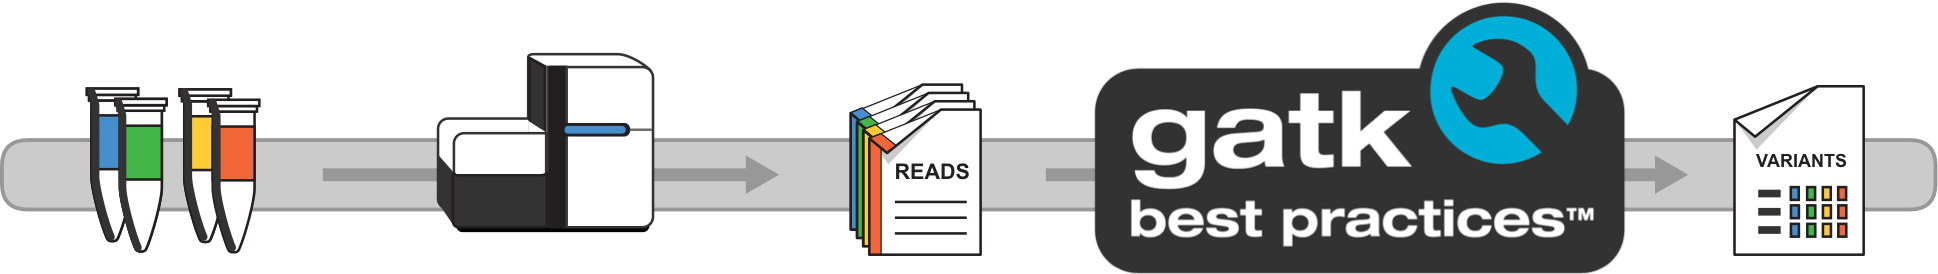

샘플에서 DNA를 추출하고 DNA를 무작위로 자른 후 sequencer가 읽을 수 있도록 library를 제작합니다. 이후 이를 sequencer에 넣고 DNA 서열을 읽어서 A, C, G, T의 서열이 나오게 됩니다.

Sequencer가 library를 한 번 읽는 단위를 리드(read)라고 합니다. 한 샘플을 Sequencer에서 서열을 읽게 되면 수백만개의 리드가 나오게 되는데 이렇게 리드로 구성된 파일을 FASTQ 파일이라고 합니다.

FASTQ는 네 줄이 하나의 리드로 구성됩니다. 첫 번째 줄은 헤더, 두 번째 줄은 서열, 세 번째 줄은 구분자, 네 번째 줄은 각 서열에 대한 퀄리티 줄입니다.

이렇게 나온 FASTQ 파일을 reference sequence, 즉 기준이 되는 서열에 mapping (alignment)을 합니다. 이렇게 mapping이 된 파일을 BAM 파일이라고 합니다. BAM 파일에서 기준 서열과 다른 서열을 찾아낼 수 있는데, 이를 변이를 찾아내는 과정, 즉 variant calling 이라고 합니다.

다시 정리해서 말하자면 샘플 -> sequencer -> FASTQ -> (reference sequence에 mapping) -> BAM -> (variant calling) -> VCF

## Sequencing read 확인


### FASTQ 파일
샘플을 Sequencer로 읽게 되면 수백만개의 리드들이 나오게 되는데, 이를 저장한 파일 포맷을 FASTQ 라고 합니다. FASTQ 파일을 살펴보겠습니다. data 디렉터리에 들어가서 fastq.gz 파일을 열어서 보겠습니다.

모든 data는 /content/drive/MyDrive/AMC_NGS1/02_linux/data 에서 확인할 수 있습니다.

In [41]:
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/data")
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data

In [42]:
!ls -al

total 72744
-rw------- 1 root root 16013759 Aug 20 02:14 normal_R1.fastq.gz
-rw------- 1 root root 16698858 Aug 20 02:14 normal_R2.fastq.gz
-rw------- 1 root root  4368573 Aug 20 00:54 sample_1.fastq.gz
-rw------- 1 root root  4376708 Aug 20 00:54 sample_2.fastq.gz
-rw------- 1 root root 16120236 Aug 20 02:18 tumor_R1.fastq.gz
-rw------- 1 root root 16909873 Aug 20 02:18 tumor_R2.fastq.gz


In [43]:
!zless --help

Usage: /usr/bin/zless [OPTION]... [FILE]...
Like 'less', but operate on the uncompressed contents of any compressed FILEs.

Options are the same as for 'less'.

Report bugs to <bug-gzip@gnu.org>.


In [44]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
# zless sample_1.fastq.gz # 터미널에서만 실행

@SRR1518133.318
CCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCTTTTCAGCATAAAAAAAATAATGTTTTTCATAA
+
CCCFFFEDDFDDFHGBGII<EHIJGIIIIJIIEIJ@F?CFFEGIGIJGIEDEGIE@HGIHDCG@CEHEEHFBCFED
@SRR1518133.319
TGTTGTAACAAAATTGGGATCACCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCTTTTCAGCATA
+
@@@FFDDDHHGHHJJGGGHIJIIIECE<CEHCECGBFB?D9?DFGEGIIJ@FEHIJIJGBGHCHGGIIJIEGGIJC
@SRR1518133.320
TCGATGTTGTAACAAAATTGGGATCACCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCTTTTCAG
+
B@@FDDDFHGHGFGFFHHBHGIEIIIJJIJIIHGHBHCFFGHIIIFHIIBGGHIBGCGEFHGH8=FHEBGFDBGI>
@SRR1518133.321
ATGCTTTCGATGTTGTAACAAAATTGGGATCACCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCT
+
CCCFFFFFHHGHFHGGIIJJGIIIJGIIDGGIIJIEGIJIIGID>FHHHJJJJIEIGIJJEFGGIIGIHGIIIIIG
@SRR1518133.322
ATCACCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCTTTTCAGCATAAAAAAAATAATGTTTTTC
+
CEECFFFFFEFHHGHEJJIIJJJJIIIIIIJJJIJIIGGDIIIIGHJJJJJJJJJJIJJJJJJHHFHFFFFFFCBC
@SRR1518133.323
TTGGGATCACCTAAACTGAGTCCAGCTGGCTAACTCTAAATATATGTGTATCTTTTCAGCATAAAAAAAATAATGT
+
sample_1.fastq.gz@SRR1518133.318
CCTAAACTGAG

In [127]:
# terminal 에서만 실행
# cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
# zless normal_R1.fastq.gz

- `zless` or `less` 사용법
  - space bar 사용시 다음 장으로 넘어감
  - 맨 끝 줄의 ":" 뒤에 q 입력시 종료

In [128]:
# terminal 에서만 실행해보기 파일 한개 열어보고 종료 후 새로운 파일 열기
# zless normal_R2.fastq.gz
# zless tumor_R1.fastq.gz
# zless tumor_R2.fastq.gz

### FASTQ 파일 구조
- ppt 자료에서 설명

- 우리가 샘플로 사용하게 될 fastq 파일은 tumor, normal tissue 유래의 sequencing data에서 21번 염색체의 read만 추출한 fastq 파일입니다.  

- fastq 파일에 들어있는 전체 리드의 개수는 몇 개 일까요?

  - fastq 파일의 전체 라인의 개수에 [[Quiz-1]] 를 나누게 되면 리드의 개수가 됩니다.

In [129]:
!wc --help

Usage: wc [OPTION]... [FILE]...
  or:  wc [OPTION]... --files0-from=F
Print newline, word, and byte counts for each FILE, and a total line if
more than one FILE is specified.  A word is a non-zero-length sequence of
characters delimited by white space.

With no FILE, or when FILE is -, read standard input.

The options below may be used to select which counts are printed, always in
the following order: newline, word, character, byte, maximum line length.
  -c, --bytes            print the byte counts
  -m, --chars            print the character counts
  -l, --lines            print the newline counts
      --files0-from=F    read input from the files specified by
                           NUL-terminated names in file F;
                           If F is - then read names from standard input
  -L, --max-line-length  print the maximum display width
  -w, --words            print the word counts
      --help     display this help and exit
      --version  output version information and 

In [45]:
!zless tumor_R1.fastq.gz | wc -l

1070884


In [46]:
!zless tumor_R2.fastq.gz | wc -l

1070884


In [ ]:
!expr 1070884 / [[Quiz-1]]

총 267,721개의 리드가 tumor 유래의 fastq 파일에 들어있습니다.


 ### FASTQC
 이제 시퀀싱된 리드의 quality 체크를 해보겠습니다.

FastQC는 [[설치 방법 2. 프로그램 홈페이지에서 패키지를 다운받는 방법]] 에 해당합니다. 다음 페이지에 접속하여 링크를 복사할 수 있습니다. 그 후의 방법은 gatk 와 동일합니다.

링크: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

In [47]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/tools
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/tools")

In [48]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip

--2025-08-20 23:40:40--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11709692 (11M) [application/zip]
Saving to: ‘fastqc_v0.12.1.zip’

fastqc_v0.12.1.zip  100%[===================>]  11.17M  36.5MB/s    in 0.3s    

2025-08-20 23:40:40 (36.5 MB/s) - ‘fastqc_v0.12.1.zip’ saved [11709692/11709692]



In [49]:
!unzip fastqc_v0.12.1.zip
!rm fastqc_v0.12.1.zip

Archive:  fastqc_v0.12.1.zip
   creating: FastQC/
  inflating: FastQC/htsjdk.jar       
  inflating: FastQC/README.md        
  inflating: FastQC/INSTALL.txt      
  inflating: FastQC/LICENSE          
   creating: FastQC/net/
   creating: FastQC/net/sourceforge/
   creating: FastQC/net/sourceforge/iharder/
   creating: FastQC/net/sourceforge/iharder/base64/
  inflating: FastQC/net/sourceforge/iharder/base64/Base64.class  
  inflating: FastQC/net/sourceforge/iharder/base64/Base64$InputStream.class  
  inflating: FastQC/net/sourceforge/iharder/base64/Base64$1.class  
  inflating: FastQC/net/sourceforge/iharder/base64/Base64$OutputStream.class  
  inflating: FastQC/LICENSE_JHDF5.txt  
   creating: FastQC/Templates/
   creating: FastQC/Templates/Icons/
 extracting: FastQC/Templates/Icons/tick.png  
 extracting: FastQC/Templates/Icons/error.png  
 extracting: FastQC/Templates/Icons/fastqc_icon.png  
 extracting: FastQC/Templates/Icons/warning.png  
  inflating: FastQC/Templates/fastqc2fo.x

In [50]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/tools/FastQC/
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/tools/FastQC/")

In [51]:
!ls -al

total 11031
-rw------- 1 root root 9267374 Aug  3  2022 cisd-jhdf5.jar
drwx------ 2 root root    4096 Mar  1  2023 Configuration
-rwx------ 1 root root   16438 Feb 16  2023 fastqc
-rw------- 1 root root    2238 Aug  3  2022 fastqc_icon.ico
drwx------ 5 root root    4096 Mar  1  2023 Help
-rw------- 1 root root 1799577 Feb 16  2023 htsjdk.jar
-rw------- 1 root root    6477 Aug  3  2022 INSTALL.txt
-rw------- 1 root root   50147 Aug  3  2022 jbzip2-0.9.jar
-rw------- 1 root root   35147 Feb 16  2023 LICENSE
-rw------- 1 root root   11766 Aug  3  2022 LICENSE_JHDF5.txt
-rw------- 1 root root   35147 Aug  3  2022 LICENSE.txt
drwx------ 3 root root    4096 Mar  1  2023 net
drwx------ 3 root root    4096 Mar  1  2023 org
-rw------- 1 root root    1044 Aug  3  2022 README.md
-rw------- 1 root root    2242 Aug  3  2022 README.txt
-rw------- 1 root root   39770 Mar  1  2023 RELEASE_NOTES.txt
-rw------- 1 root root     104 Aug  3  2022 run_fastqc.bat
drwx------ 3 root root    4096 Mar  1  2023 T

In [52]:
!./fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

fastq 파일들이 모여있는 directory (/content/drive/MyDrive/AMC_NGS1/02_linux/data)로 이동 후 `FastQC`를 수행합니다. 기본 방식은 다음과 같습니다.

```
# Example
fastqc \
  readfile1 \
  readfile2 \
  readfile3 \
  readfile4 \
  -o output_directory
  ```

In [53]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/data/")

In [54]:
!mkdir fastqc

In [55]:
# runtime: 40s
!/content/drive/MyDrive/AMC_NGS1/02_linux/tools/FastQC/fastqc \
  normal_R1.fastq.gz \
  normal_R2.fastq.gz \
  tumor_R1.fastq.gz \
  tumor_R2.fastq.gz \
  -o fastqc

application/gzip
application/gzip
application/gzip
application/gzip
Started analysis of normal_R1.fastq.gz
Approx 5% complete for normal_R1.fastq.gz
Approx 10% complete for normal_R1.fastq.gz
Approx 15% complete for normal_R1.fastq.gz
Approx 20% complete for normal_R1.fastq.gz
Approx 25% complete for normal_R1.fastq.gz
Approx 30% complete for normal_R1.fastq.gz
Approx 35% complete for normal_R1.fastq.gz
Approx 40% complete for normal_R1.fastq.gz
Approx 45% complete for normal_R1.fastq.gz
Approx 50% complete for normal_R1.fastq.gz
Approx 55% complete for normal_R1.fastq.gz
Approx 60% complete for normal_R1.fastq.gz
Approx 65% complete for normal_R1.fastq.gz
Approx 70% complete for normal_R1.fastq.gz
Approx 75% complete for normal_R1.fastq.gz
Approx 80% complete for normal_R1.fastq.gz
Approx 85% complete for normal_R1.fastq.gz
Approx 90% complete for normal_R1.fastq.gz
Approx 95% complete for normal_R1.fastq.gz
Analysis complete for normal_R1.fastq.gz
Started analysis of normal_R2.fastq.

fastqc 결과를 확인합니다.

/content/drive/MyDrive/AMC_NGS1/02_linux/data/fastqc 에 4개의 fastq 파일의 quality check 결과가 생성되어 있습니다. 아래의 `html` 링크를 그대로 클릭하면 우리가 읽을 수 없는 형태로 되어있습니다. html 파일 다운로드 후 google chrome으로 연결하면 제대로 볼 수 있습니다.

- tumor read1: /content/drive/MyDrive/AMC_NGS1/02_linux/data/fastqc/tumor_R1_fastqc.html

- tumor read2: /content/drive/MyDrive/AMC_NGS1/02_linux/data/fastqc/tumor_R2_fastqc.html

- normal read1: /content/drive/MyDrive/AMC_NGS1/02_linux/data/fastqc/normal_R1_fastqc.html

- normal read2: /content/drive/MyDrive/AMC_NGS1/02_linux/data/fastqc/normal_R1_fastqc.html

### FASTQC 결과 해석

ppt 파일에서 함께 확인

## Mapping (Alignment)

BWA 툴을 사용하여 기준서열 (reference sequence) 에 리드들을 mapping 하는 과정입니다.

### Reference sequence 란?

### Mapping 수행

모든 분석은 /content/drive/MyDrive/AMC_NGS1/02_linux/data 에서 수행

우리가 가지고 있는 fastq reads
- tumor tissue 유래 paired end 1쌍 (R1, R2)
- normal tissue 유래 paried end 1쌍 (R1, R2)

In [56]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/data")

In [57]:
# runtime: 0s
!bwa mem -t 1 -R "@RG\tID:normal\tSM:normal\tPL:platform" \
  ../resource/reference/hg38.chr21.fa \
  normal_R1.fastq.gz \
  normal_R2.fastq.gz > normal.sam 2> normal.bwa.log

In [58]:
!ls -al

total 72748
drwx------ 2 root root     4096 Aug 20 23:41 fastqc
-rw------- 1 root root       59 Aug 20 23:41 normal.bwa.log
-rw------- 1 root root 16013759 Aug 20 02:14 normal_R1.fastq.gz
-rw------- 1 root root 16698858 Aug 20 02:14 normal_R2.fastq.gz
-rw------- 1 root root        0 Aug 20 23:41 normal.sam
-rw------- 1 root root  4368573 Aug 20 00:54 sample_1.fastq.gz
-rw------- 1 root root  4376708 Aug 20 00:54 sample_2.fastq.gz
-rw------- 1 root root 16120236 Aug 20 02:18 tumor_R1.fastq.gz
-rw------- 1 root root 16909873 Aug 20 02:18 tumor_R2.fastq.gz


In [59]:
!cat normal.bwa.log

[E::bwa_idx_load_from_disk] fail to locate the index files


에러 해결: https://github.com/jts/methylation-analysis/issues/13

In [60]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference") # 노트북에서만 실행

In [61]:
# runtime: 60s
!bwa index hg38.chr21.fa

[bwa_index] Pack FASTA... 0.43 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=93419966, availableWord=18573208
[BWTIncConstructFromPacked] 10 iterations done. 30636734 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 56597342 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 79667134 characters processed.
[bwt_gen] Finished constructing BWT in 37 iterations.
[bwa_index] 55.92 seconds elapse.
[bwa_index] Update BWT... 0.41 sec
[bwa_index] Pack forward-only FASTA... 0.44 sec
[bwa_index] Construct SA from BWT and Occ... 16.95 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index hg38.chr21.fa
[main] Real time: 75.893 sec; CPU: 74.157 sec


In [62]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/data")

In [63]:
# runtime: 65s
!bwa mem \
  -t 1 \
  -R "@RG\tID:normal\tSM:normal\tPL:platform" \
  ../resource/reference/hg38.chr21.fa \
  normal_R1.fastq.gz \
  normal_R2.fastq.gz > normal.sam 2> normal.bwa.log

In [ ]:
# 터미널에서 실행
# less normal.sam

**Header 정보 |** @SQ     SN:chr21        LN:46709983

**Header 정보 |** @RG     ID:normal       SM:normal       PL:platform

**Header 정보 |**  @PG     ID:bwa  PN:bwa  VN:0.7.17-r1188 CL:bwa mem -t 1 -R
@RG\tID:normal\tSM:normal\tPL:platform ../resource/reference/hg38.chr21.fa normal_R1.fastq.gz normal_R2.fastq.gz

**Read 정보 |** normal#21#998579#1      99      chr21   20998580        60      100M          =       20998796        316     CCTTCTCCCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTAGGAGTGTGGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCCCCCCGGCCAAGAGAGG        102302000331;3333;23133320233330*33/233333333333333/313232333/3;3;3/333000;11/00;;01//103*1032323233  NM:i:2  MD:Z:6A77A15    MC:Z:100M     AS:i:90 XS:i:0  RG:Z:normal

**Read 정보 |** normal#21#998579#1      147     chr21   20998796        60      100M          =       20998580        -316    GTGGAGACCCTTAAATAAGAGAAGGGAAAATACAGAATTGGAGAGGGGAATCGGTGAGCAGGATATCCAGGGAAACAGCTTCTGCTTCTTCTTTTTTTTT        030/3133332332;22303032/11;;23033312;22/130300102;23/000;/*;0030;3333/112333203333013333233332333320  NM:i:2  MD:Z:76C6T16    MC:Z:100M     AS:i:90 XS:i:0  RG:Z:normal


### Mapping 정보 확인 (sam 파일의 구조 확인)

ppt 에서 함께 확인

### sam to bam

기본적으로 BWA mem 커맨드를 사용하여 나오게되는 파일은 sam 파일입니다. 실제 연구 또는 업무에서는 sam 파일은 크기가 너무 크므로 이를 binary 형태로 압축한 bam 파일을 많이 사용합니다.  
`samtools` 프로그램을 사용하여 sam 파일을 bam 파일로 변환해 봅시다.

In [64]:
# runtime: 10s
!apt-get install samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [65]:
!samtools --help


Program: samtools (Tools for alignments in the SAM format)
Version: 1.13 (using htslib 1.13+ds)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates
     ampliconclip   clip oligos from the end of reads

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if

In [66]:
# runtime: 4s
!samtools view -Sb normal.sam > normal.bam

이렇게 sequencer에서 나온 리드들을 기준서열에 mapping 하였습니다. 우리가 mapping한 리드를 눈으로 살펴 보겠습니다

In [ ]:
# 터미널에서 실행
# less normal.bam

In [67]:
!samtools view -H normal.bam

@SQ	SN:chr21	LN:46709983
@RG	ID:normal	SM:normal	PL:platform
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 1 -R @RG\tID:normal\tSM:normal\tPL:platform ../resource/reference/hg38.chr21.fa normal_R1.fastq.gz normal_R2.fastq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -Sb normal.sam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools view -H normal.bam


In [68]:
!samtools view normal.bam | head -10

normal#21#998579#1	99	chr21	20998580	60	100M	=	20998796	316	CCTTCTCCCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTAGGAGTGTGGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCCCCCCGGCCAAGAGAGG	102302000331;3333;23133320233330*33/233333333333333/313232333/3;3;3/333000;11/00;;01//103*1032323233	NM:i:2	MD:Z:6A77A15	MC:Z:100M	AS:i:90	XS:i:0	RG:Z:normal
normal#21#998579#1	147	chr21	20998796	60	100M	=	20998580	-316	GTGGAGACCCTTAAATAAGAGAAGGGAAAATACAGAATTGGAGAGGGGAATCGGTGAGCAGGATATCCAGGGAAACAGCTTCTGCTTCTTCTTTTTTTTT	030/3133332332;22303032/11;;23033312;22/130300102;23/000;/*;0030;3333/112333203333013333233332333320	NM:i:2	MD:Z:76C6T16	MC:Z:100M	AS:i:90	XS:i:0	RG:Z:normal
normal#21#998572#2	99	chr21	20998573	60	100M	=	20998746	273	CTCCTCTCCTTCTACCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTCGGAGTGTTGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCCACCCGGCCA	/201302/0330;30033133333;230;333033333033300333203333333;*03133;223300;2;3/33211/210001;2/13/0133//3	NM:i:2	MD:Z:48A7G43	MC:Z:46M1I54M	AS:i:90	XS:i:0	RG:Z:normal
normal#21#998572#2	147	chr21	20998746

In [69]:
!samtools flagstat normal.bam

533472 + 0 in total (QC-passed reads + QC-failed reads)
533472 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
533472 + 0 mapped (100.00% : N/A)
533472 + 0 primary mapped (100.00% : N/A)
533472 + 0 paired in sequencing
266736 + 0 read1
266736 + 0 read2
533472 + 0 properly paired (100.00% : N/A)
533472 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### Sort

In [70]:
# runtime: 5s
!samtools sort \
  -@ 1 \
  -o normal.s.bam \
  normal.bam

In [71]:
!samtools index normal.s.bam

How to check <normal.s.bam> is sorted?

In [72]:
!samtools view -H normal.bam

@SQ	SN:chr21	LN:46709983
@RG	ID:normal	SM:normal	PL:platform
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 1 -R @RG\tID:normal\tSM:normal\tPL:platform ../resource/reference/hg38.chr21.fa normal_R1.fastq.gz normal_R2.fastq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -Sb normal.sam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools view -H normal.bam


In [73]:
!samtools view -H normal.s.bam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr21	LN:46709983
@RG	ID:normal	SM:normal	PL:platform
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 1 -R @RG\tID:normal\tSM:normal\tPL:platform ../resource/reference/hg38.chr21.fa normal_R1.fastq.gz normal_R2.fastq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -Sb normal.sam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools sort -@ 1 -o normal.s.bam normal.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.13	CL:samtools view -H normal.s.bam


read들을 한 눈에 볼 수 있는 방법

- 사용법
  - "/" 입력 후 좌표 입력 "chr21:20998580"
  - 종료시 "q" 입력

In [ ]:
# 터미널에서만 실행
# samtools tview normal.s.bam

### Mark duplication

이번에는 리드에서 duplication, 즉 중복이 있는 리드를 표기하는 방법에 대해 알아보겠습니다.  
여기서 중복이라고 말하는 것은 무엇일까요? Sequencing을 진행하게 되면 필연적으로 PCR (Polymerase Chain Reaction) 과정에 의해 중복 리드가 발생하게 되는데요, 이러한 중복 리드들은 variant calling 과정에서 영향을 주게 됩니다. 그래서 duplication을 마킹하여 variant calling 때 영향을 주지 않도록 만들어야만 합니다.

In [74]:
#runtime: 23s
!java -jar \
  /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  MarkDuplicates \
  --REMOVE_DUPLICATES false \
  --INPUT normal.s.bam \
  --OUTPUT normal.s.md.bam \
  --CREATE_INDEX true \
  --METRICS_FILE normal.md.metrics

23:46:08.765 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Wed Aug 20 23:46:08 UTC 2025] MarkDuplicates --INPUT normal.s.bam --OUTPUT normal.s.md.bam --METRICS_FILE normal.md.metrics --REMOVE_DUPLICATES false --CREATE_INDEX true --MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP 50000 --MAX_FILE_HANDLES_FOR_READ_ENDS_MAP 8000 --SORTING_COLLECTION_SIZE_RATIO 0.25 --TAG_DUPLICATE_SET_MEMBERS false --REMOVE_SEQUENCING_DUPLICATES false --TAGGING_POLICY DontTag --CLEAR_DT true --DUPLEX_UMI false --FLOW_MODE false --FLOW_QUALITY_SUM_STRATEGY false --USE_END_IN_UNPAIRED_READS false --USE_UNPAIRED_CLIPPED_END false --UNPAIRED_END_UNCERTAINTY 0 --FLOW_SKIP_FIRST_N_FLOWS 0 --FLOW_Q_IS_KNOWN_END false --FLOW_EFFECTIVE_QUALITY_THRESHOLD 15 --ADD_PG_TAG_TO_READS true --ASSUME_SORTED false --DUPLICATE_SCORING_STRATEGY SUM_OF_BASE_QUALITIES --PROGRAM_RE

In [75]:
# notebook에서만 실행
import pandas as pd
from IPython.display import display

file_path = "normal.md.metrics"

df = pd.read_csv(
    file_path,
    sep="\t",
    comment="#",           # '#'으로 시작하는 주석 줄은 무시
    skip_blank_lines=True,
    nrows=1                # 첫 번째 데이터 행만 읽기
)

df = df[['PERCENT_DUPLICATION',
         'READ_PAIRS_EXAMINED',
         'READ_PAIR_DUPLICATES',
         'READ_PAIR_OPTICAL_DUPLICATES']]

# 데이터 확인
df_t = df.T
df_t.columns = ["Value"]

display(df)

,PERCENT_DUPLICATION,READ_PAIRS_EXAMINED,READ_PAIR_DUPLICATES,READ_PAIR_OPTICAL_DUPLICATES
0,0.000532,266736,142,0


How to find the duplicated reads?

https://broadinstitute.github.io/picard/explain-flags.html

You can find the duplicated reads using the flag "[[Quiz-2]]"

In [77]:
!samtools view -f [[Quiz-2]] normal.s.md.bam | wc -l

284


In [ ]:
!samtools view -f [[Quiz-2]] normal.s.md.bam | head -2

### Base recalibration


Calculate the recalibration table

In [78]:
#runtime: 60s
!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  BaseRecalibrator \
  -I normal.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --known-sites /content/drive/MyDrive/AMC_NGS1/02_linux/resource/knownsites/hg38_v0_Homo_sapiens_assembly38.known_indels.chr21.vcf.gz \
  -L chr21 \
  -O normal.recal_data.table

23:47:09.752 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
23:47:10.038 INFO  BaseRecalibrator - ------------------------------------------------------------
23:47:10.039 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.3.0.0
23:47:10.039 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
23:47:10.040 INFO  BaseRecalibrator - Executing as root@49a1eeb69d60 on Linux v6.1.123+ amd64
23:47:10.040 INFO  BaseRecalibrator - Java runtime: OpenJDK 64-Bit Server VM v11.0.28+6-post-Ubuntu-1ubuntu122.04.1
23:47:10.040 INFO  BaseRecalibrator - Start Date/Time: August 20, 2025 at 11:47:09 PM UTC
23:47:10.040 INFO  BaseRecalibrator - ------------------------------------------------------------
23:47:10.040 INFO  BaseRecalibrator - ----------------------------------------------

In [ ]:
# terminal 에서 실행
# less normal.recal_data.table

In [79]:
#runtime: 26s
!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  ApplyBQSR \
  -I normal.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --bqsr-recal-file normal.recal_data.table \
  -L chr21 \
  -O normal.s.md.recal.bam

23:49:05.287 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
23:49:05.858 INFO  ApplyBQSR - ------------------------------------------------------------
23:49:05.859 INFO  ApplyBQSR - The Genome Analysis Toolkit (GATK) v4.3.0.0
23:49:05.860 INFO  ApplyBQSR - For support and documentation go to https://software.broadinstitute.org/gatk/
23:49:05.861 INFO  ApplyBQSR - Executing as root@49a1eeb69d60 on Linux v6.1.123+ amd64
23:49:05.861 INFO  ApplyBQSR - Java runtime: OpenJDK 64-Bit Server VM v11.0.28+6-post-Ubuntu-1ubuntu122.04.1
23:49:05.861 INFO  ApplyBQSR - Start Date/Time: August 20, 2025 at 11:49:05 PM UTC
23:49:05.861 INFO  ApplyBQSR - ------------------------------------------------------------
23:49:05.861 INFO  ApplyBQSR - ------------------------------------------------------------
23:49:05.862 INFO  ApplyBQSR - HTSJDK Ver

In [80]:
!ls -al normal.sam normal*.bam

-rw------- 1 root root  46988789 Aug 20 23:45 normal.bam
-rw------- 1 root root 175050433 Aug 20 23:44 normal.sam
-rw------- 1 root root  44554897 Aug 20 23:45 normal.s.bam
-rw------- 1 root root  56650422 Aug 20 23:46 normal.s.md.bam
-rw------- 1 root root  67113885 Aug 20 23:49 normal.s.md.recal.bam


### Pipeline (normal tissue)

In [81]:
!cd /content/drive/MyDrive/AMC_NGS1/02_linux/data
cd("/content/drive/MyDrive/AMC_NGS1/02_linux/data")

In [82]:
# runtime: 120~180s
!bwa mem -t 1 -R "@RG\tID:normal\tSM:normal\tPL:platform" \
  ../resource/reference/hg38.chr21.fa \
  normal_R1.fastq.gz \
  normal_R2.fastq.gz > normal.sam 2> normal.bwa.log

!samtools view -Sb normal.sam > normal.bam

!samtools sort \
  -@ 1 \
  -o normal.s.bam \
  normal.bam

!java -jar \
  /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  MarkDuplicates \
  --REMOVE_DUPLICATES false \
  --INPUT normal.s.bam \
  --OUTPUT normal.s.md.bam \
  --CREATE_INDEX true \
  --METRICS_FILE normal.md.metrics

!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  BaseRecalibrator \
  -I normal.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --known-sites /content/drive/MyDrive/AMC_NGS1/02_linux/resource/knownsites/hg38_v0_Homo_sapiens_assembly38.known_indels.chr21.vcf.gz \
  -L chr21 \
  -O normal.recal_data.table

!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  ApplyBQSR \
  -I normal.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --bqsr-recal-file normal.recal_data.table \
  -L chr21 \
  -O normal.s.md.recal.bam

23:53:36.275 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Wed Aug 20 23:53:36 UTC 2025] MarkDuplicates --INPUT normal.s.bam --OUTPUT normal.s.md.bam --METRICS_FILE normal.md.metrics --REMOVE_DUPLICATES false --CREATE_INDEX true --MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP 50000 --MAX_FILE_HANDLES_FOR_READ_ENDS_MAP 8000 --SORTING_COLLECTION_SIZE_RATIO 0.25 --TAG_DUPLICATE_SET_MEMBERS false --REMOVE_SEQUENCING_DUPLICATES false --TAGGING_POLICY DontTag --CLEAR_DT true --DUPLEX_UMI false --FLOW_MODE false --FLOW_QUALITY_SUM_STRATEGY false --USE_END_IN_UNPAIRED_READS false --USE_UNPAIRED_CLIPPED_END false --UNPAIRED_END_UNCERTAINTY 0 --FLOW_SKIP_FIRST_N_FLOWS 0 --FLOW_Q_IS_KNOWN_END false --FLOW_EFFECTIVE_QUALITY_THRESHOLD 15 --ADD_PG_TAG_TO_READS true --ASSUME_SORTED false --DUPLICATE_SCORING_STRATEGY SUM_OF_BASE_QUALITIES --PROGRAM_RE

### Pipeline (tumor tissue)

In [83]:
# runtime: 120s
!bwa mem -t 1 -R "@RG\tID:tumor\tSM:tumor\tPL:platform" \
  ../resource/reference/hg38.chr21.fa \
  tumor_R1.fastq.gz \
  tumor_R2.fastq.gz > tumor.sam 2> tumor.bwa.log

!samtools view -Sb tumor.sam > tumor.bam

!samtools sort \
  -@ 1 \
  -o tumor.s.bam \
  tumor.bam

!java -jar \
  /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  MarkDuplicates \
  --REMOVE_DUPLICATES false \
  --INPUT tumor.s.bam \
  --OUTPUT tumor.s.md.bam \
  --CREATE_INDEX true \
  --METRICS_FILE tumor.md.metrics

!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  BaseRecalibrator \
  -I tumor.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --known-sites /content/drive/MyDrive/AMC_NGS1/02_linux/resource/knownsites/hg38_v0_Homo_sapiens_assembly38.known_indels.chr21.vcf.gz \
  -L chr21 \
  -O tumor.recal_data.table

!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  ApplyBQSR \
  -I tumor.s.md.bam \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --bqsr-recal-file tumor.recal_data.table \
  -L chr21 \
  -O tumor.s.md.recal.bam

23:58:21.778 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Wed Aug 20 23:58:21 UTC 2025] MarkDuplicates --INPUT tumor.s.bam --OUTPUT tumor.s.md.bam --METRICS_FILE tumor.md.metrics --REMOVE_DUPLICATES false --CREATE_INDEX true --MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP 50000 --MAX_FILE_HANDLES_FOR_READ_ENDS_MAP 8000 --SORTING_COLLECTION_SIZE_RATIO 0.25 --TAG_DUPLICATE_SET_MEMBERS false --REMOVE_SEQUENCING_DUPLICATES false --TAGGING_POLICY DontTag --CLEAR_DT true --DUPLEX_UMI false --FLOW_MODE false --FLOW_QUALITY_SUM_STRATEGY false --USE_END_IN_UNPAIRED_READS false --USE_UNPAIRED_CLIPPED_END false --UNPAIRED_END_UNCERTAINTY 0 --FLOW_SKIP_FIRST_N_FLOWS 0 --FLOW_Q_IS_KNOWN_END false --FLOW_EFFECTIVE_QUALITY_THRESHOLD 15 --ADD_PG_TAG_TO_READS true --ASSUME_SORTED false --DUPLICATE_SCORING_STRATEGY SUM_OF_BASE_QUALITIES --PROGRAM_RECOR

In [ ]:
!rm normal.sam normal.s.md.bai normal.s.bam.bai tumor.s.md.bai normal.bwa.log normal.bam normal.s.bam normal.md.metrics normal.recal_data.table normal.s.md.bam
!rm tumor.sam tumor.s.md.bai tumor.s.bam.bai tumor.s.md.bai tumor.bwa.log tumor.bam tumor.s.bam tumor.md.metrics tumor.recal_data.table tumor.s.md.bam

In [ ]:
!ls -al

## Variant calling




### Somatic vs. Germline mutation calling

ppt에서 설명

### Mutect2를 이용한 somatic mutation calling

참조문서: https://gatk.broadinstitute.org/hc/en-us/articles/360037593851-Mutect2

Tumor with matched normal
Given a matched normal, **Mutect2 is designed to call somatic variants only**. The tool includes logic to **skip emitting variants** that are clearly present in the germline based on provided evidence, e.g. in the matched normal. This is done at an early stage to avoid spending computational resources on germline events. If the variant's **germline status is borderline**, then Mutect2 will emit the variant to the callset for subsequent filtering by **FilterMutectCalls** and review.

```
gatk Mutect2 \
     -R reference.fa \
     -I tumor.bam \
     -I normal.bam \
     -normal normal_sample_name \
     --germline-resource af-only-gnomad.vcf.gz \
     -O somatic.vcf.gz
```


In [84]:
#runtime: 30s
!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  Mutect2 \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  -I tumor.s.md.recal.bam \
  -I normal.s.md.recal.bam \
  -normal normal \
  --germline-resource /content/drive/MyDrive/AMC_NGS1/02_linux/resource/knownsites/af-only-gnomad.hg38.chr21.vcf.gz \
  -L chr21q \
  -O somatic.vcf.gz

00:01:42.453 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
00:01:42.732 INFO  Mutect2 - ------------------------------------------------------------
00:01:42.733 INFO  Mutect2 - The Genome Analysis Toolkit (GATK) v4.3.0.0
00:01:42.734 INFO  Mutect2 - For support and documentation go to https://software.broadinstitute.org/gatk/
00:01:42.734 INFO  Mutect2 - Executing as root@49a1eeb69d60 on Linux v6.1.123+ amd64
00:01:42.734 INFO  Mutect2 - Java runtime: OpenJDK 64-Bit Server VM v11.0.28+6-post-Ubuntu-1ubuntu122.04.1
00:01:42.734 INFO  Mutect2 - Start Date/Time: August 21, 2025 at 12:01:42 AM UTC
00:01:42.735 INFO  Mutect2 - ------------------------------------------------------------
00:01:42.735 INFO  Mutect2 - ------------------------------------------------------------
00:01:42.737 INFO  Mutect2 - HTSJDK Version: 3.0.1
00:01:

In [85]:
# runtime: 6s
!java -jar /content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar \
  FilterMutectCalls \
  -R /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  -V somatic.vcf.gz \
  -O filtered.vcf.gz

00:17:38.584 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/drive/MyDrive/AMC_NGS1/02_linux/tools/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
00:17:38.859 INFO  FilterMutectCalls - ------------------------------------------------------------
00:17:38.860 INFO  FilterMutectCalls - The Genome Analysis Toolkit (GATK) v4.3.0.0
00:17:38.860 INFO  FilterMutectCalls - For support and documentation go to https://software.broadinstitute.org/gatk/
00:17:38.860 INFO  FilterMutectCalls - Executing as root@49a1eeb69d60 on Linux v6.1.123+ amd64
00:17:38.860 INFO  FilterMutectCalls - Java runtime: OpenJDK 64-Bit Server VM v11.0.28+6-post-Ubuntu-1ubuntu122.04.1
00:17:38.861 INFO  FilterMutectCalls - Start Date/Time: August 21, 2025 at 12:17:38 AM UTC
00:17:38.861 INFO  FilterMutectCalls - ------------------------------------------------------------
00:17:38.861 INFO  FilterMutectCalls - --------------------------------------

최종 vcf 확인

In [86]:
# runtime: 8s
!apt-get install bcftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  python3-numpy python3-matplotlib texlive-latex-recommended
The following NEW packages will be installed:
  bcftools
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 697 kB of archives.
After this operation, 2,360 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bcftools amd64 1.13-1 [697 kB]
Fetched 697 kB in 0s (6,182 kB/s)
Selecting previously unselected package bcftools.
(Reading database ... 126495 files and directories currently installed.)
Preparing to unpack .../bcftools_1.13-1_amd64.deb ...
Unpacking bcftools (1.13-1) ...
Setting up bcftools (1.13-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [87]:
!bcftools stats filtered.vcf.gz

# This file was produced by bcftools stats (1.13+htslib-1.13+ds) and can be plotted using plot-vcfstats.
# The command line was:	bcftools stats  filtered.vcf.gz
#
# Definition of sets:
# ID	[2]id	[3]tab-separated file names
ID	0	filtered.vcf.gz
# SN, Summary numbers:
#   number of records   .. number of data rows in the VCF
#   number of no-ALTs   .. reference-only sites, ALT is either "." or identical to REF
#   number of SNPs      .. number of rows with a SNP
#   number of MNPs      .. number of rows with a MNP, such as CC>TT
#   number of indels    .. number of rows with an indel
#   number of others    .. number of rows with other type, for example a symbolic allele or
#                          a complex substitution, such as ACT>TCGA
#   number of multiallelic sites     .. number of rows with multiple alternate alleles
#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs
# 
#   Note that rows containing multiple types will be counted mu

In [89]:
# SNV만 추출
!bcftools view -v snps filtered.vcf.gz -o somatic.snvs.vcf

# indel만 추출
!bcftools view -v indels filtered.vcf.gz -o somatic.indels.vcf

In [91]:
!bcftools view -H filtered.vcf.gz

chr21	10590479	.	G	T	.	base_qual;haplotype;weak_evidence	AS_FilterStatus=weak_evidence,base_qual;AS_SB_TABLE=48,1|2,0;DP=51;ECNT=2;GERMQ=79;MBQ=18,16;MFRL=321,314;MMQ=60,60;MPOS=20;NALOD=1.36;NLOD=6.62;POPAF=6;TLOD=3.32	GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB	0|0:23,0:0.042:23:0,0:0,0:22,0:0|1:10590479_G_T:10590479:22,1,0,0	0|1:26,2:0.1:28:0,0:0,0:26,2:0|1:10590479_G_T:10590479:26,0,2,0
chr21	10590485	.	G	T	.	base_qual;haplotype;weak_evidence	AS_FilterStatus=weak_evidence,base_qual;AS_SB_TABLE=51,2|3,0;DP=56;ECNT=2;GERMQ=80;MBQ=19,18;MFRL=321,327;MMQ=60,60;MPOS=17;NALOD=1.38;NLOD=6.92;POPAF=6;TLOD=3.66	GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB	0|0:25,0:0.04:25:6,0:0,0:23,0:0|1:10590479_G_T:10590479:23,2,0,0	0|1:28,3:0.112:31:5,1:0,0:28,3:0|1:10590479_G_T:10590479:28,0,3,0
chr21	14517382	.	T	G	.	base_qual;weak_evidence	AS_FilterStatus=weak_evidence,base_qual;AS_SB_TABLE=0,17|0,2;DP=20;ECNT=1;GERMQ=3;MBQ=15,18;MFRL=486,379;MMQ=60,60;MPOS=43;NALOD=1.06;NLOD=3;POPAF=6;TLOD=4.8	GT:AD:AF:DP:F1

In [92]:
!bcftools view -H filtered.vcf.gz | cut -f 7

base_qual;haplotype;weak_evidence
base_qual;haplotype;weak_evidence
base_qual;weak_evidence
base_qual
weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;haplotype
base_qual;haplotype
base_qual;weak_evidence
PASS
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
weak_evidence
base_qual;haplotype;weak_evidence
haplotype;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual
base_qual;weak_evidence
weak_evidence
base_qual;weak_evidence
weak_evidence
base_qual;weak_evidence
base_qual
base_qual;haplotype
base_qual;haplotype
base_qual
base_qual
weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
weak_evidence
base_qual
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_evidence
base_qual;weak_eviden

In [95]:
!bcftools view -f 'PASS' filtered.vcf.gz -o somatic.pass.vcf

## Annotation using vcf2maf

### Docker install

jupyter notebook에서 docker 사용하는 방법: https://github.com/indigo-dc/udocker

In [97]:
# runtime: 12s
!pip install udocker
!udocker --allow-root install

  Using cached udocker-1.3.17-py2.py3-none-any.whl.metadata (37 kB)
Using cached udocker-1.3.17-py2.py3-none-any.whl (119 kB)


dockerhub 등에서 필요한 패키지 검색 후 다운로드

https://hub.docker.com/u/oghzzang


In [117]:
# runtime: 57s
!udocker --allow-root pull oghzzang/vcf2maf:v1.6.18_chr21

Info: downloading layer sha256:8bb6fb2df1a7e2501927127b5babd8e7fb5c0c2bbd2bed41d8238cc15121b7be
Info: downloading layer sha256:3971f078252b77ce63ae67ab86cd97e58deffe0890d707a5fa332f2a8fbedef9
Info: downloading layer sha256:270761053b031626108f9054bbbf515578437905518e918bbe2db5e25d287bd2
Info: downloading layer sha256:0102a72864f7c35282e8a1ac6f422b2e80630a8c53c3936f4464916e13ce7888
Info: downloading layer sha256:43f67a011cd010e97c2f2524a68698afc8b6d081314a624bc5e2bd07b78f3eb4
Info: downloading layer sha256:a64d47c52cd0c32bb765c00dba404b769dacda19668cf1f50caf24ef817ada5c


### Run vcf2maf

In [106]:
#runtime: 55s
!udocker \
  --allow-root run \
  --rm oghzzang/vcf2maf:v1.6.18_chr21 \
  perl vcf2maf.pl --help

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING ebdac9fd-524d-373f-9acf-9606c1f85919                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: perl
Usage:
     perl vcf2maf.pl --help
     perl vcf2maf.pl --input-vcf WD4086.vcf --output-maf WD4086.maf --tumor-id WD4086 --normal-id NB4086

Options:
     --input-vcf      Path to input file in VCF format
     --output-maf     Path to output MAF file
     --tmp-dir        Folder to retain intermediate VCFs after runtime [Default: Folder containing input VCF]
     --tumor-id       Tumor_Sample_Barcode to report in the MAF [TUMOR]
     --normal-id      Matched_Norm_Sample_Barcode to report in the MAF [NORMAL]
     --vcf-tumor-id   Tumor sample ID used in VCF's genotype co

In [121]:
# runtime: 49s
!udocker \
  --allow-root run \
  -v /content/drive/MyDrive/AMC_NGS1/02_linux:/content/drive/MyDrive/AMC_NGS1/02_linux \
  --rm oghzzang/vcf2maf:v1.6.18_chr21 \
  perl vcf2maf.pl \
  --input-vcf  /content/drive/MyDrive/AMC_NGS1/02_linux/data/somatic.pass.vcf \
  --output-maf /content/drive/MyDrive/AMC_NGS1/02_linux/data/somatic.pass.maf \
  --ref-fasta  /content/drive/MyDrive/AMC_NGS1/02_linux/resource/reference/hg38.chr21.fa \
  --vep-data   /.vep \
  --vep-path   /usr/local/bin \
  --ncbi-build GRCh38 \
  --cache-version 112 \
  --tumor-id tumor \
  --normal-id normal

 
 ****************************************************************************** 
 *                                                                            * 
 *               STARTING 89149a74-60ef-3a4a-974b-54e6b29faaf5                * 
 *                                                                            * 
 ****************************************************************************** 
 executing: perl
STATUS: Running VEP and writing to: /content/drive/MyDrive/AMC_NGS1/02_linux/data/somatic.pass.vep.vcf
Possible precedence issue with control flow operator at /usr/local/lib/site_perl/5.26.2/Bio/DB/IndexedBase.pm line 805.


In [122]:
ls -al somatic.pass.vep.vcf somatic.pass.maf

-rw------- 1 root root  2550 Aug 21 01:49 somatic.pass.maf
-rw------- 1 root root 19635 Aug 21 01:49 somatic.pass.vep.vcf


maf 파일 확인

/content/drive/MyDrive/AMC_NGS1/02_linux/data/somatic.pass.maf

In [123]:
# notebook에서만 실행
import pandas as pd
from IPython.display import display

file_path = "somatic.pass.maf"

df = pd.read_csv(
    file_path,
    sep="\t",
    comment="#",           # '#'으로 시작하는 주석 줄은 무시
    skip_blank_lines=True
)

display(df)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,ExAC_AC_AN,ExAC_AC_AN_AFR,ExAC_AC_AN_AMR,ExAC_AC_AN_EAS,ExAC_AC_AN_FIN,ExAC_AC_AN_NFE,ExAC_AC_AN_OTH,ExAC_AC_AN_SAS,ExAC_FILTER,vcf_pos
0,CCT8,10694,.,GRCh38,chr21,29056769,29056769,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29056769
